In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
%matplotlib inline

import os
import io

In [1]:
df = pd.read_csv('../../data/gun-violence-data_01-2013_03-2018.csv')
print(df.shape)
df.head()

NameError: name 'pd' is not defined

In [9]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [11]:
df['state'].unique()

array(['Pennsylvania', 'California', 'Ohio', 'Colorado', 'North Carolina',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Maryland', 'Tennessee',
       'Missouri', 'District of Columbia', 'Illinois', 'Delaware', 'Utah',
       'Michigan', 'Georgia', 'Indiana', 'Mississippi', 'New York',
       'Florida', 'Washington', 'South Carolina', 'Arizona', 'Kentucky',
       'New Jersey', 'Virginia', 'Wisconsin', 'Rhode Island', 'Texas',
       'Alabama', 'Kansas', 'Connecticut', 'West Virginia', 'Minnesota',
       'Nevada', 'Nebraska', 'Massachusetts', 'Hawaii', 'New Hampshire',
       'Iowa', 'Alaska', 'Arkansas', 'Idaho', 'Oregon', 'Wyoming',
       'Maine', 'North Dakota', 'Montana', 'Vermont', 'South Dakota'],
      dtype=object)

In [12]:
df['state'].value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [13]:
df.drop([
    "incident_id",
    "incident_url",
    "sources",
    "source_url",
    "incident_url_fields_missing",
    "location_description",
    "participant_relationship",
    ], axis=1, inplace=True)

##Converting object datatype to datetime
df["date"] = pd.to_datetime(df["date"])

## To create column-day,month,year,weekday ,week and quarter.
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["weekday"] = df["date"].dt.weekday
df["week"] = df["date"].dt.week
df["quarter"] = df["date"].dt.quarter

df.head()

,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,participant_status,participant_type,state_house_district,state_senate_district,day,month,year,weekday,week,quarter
0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1,1,2013,1,1,1
1,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1,1,2013,1,1,1
2,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,2013,1,1,1
3,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,5,1,2013,5,1,1
4,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,7,1,2013,0,2,1


In [14]:
# checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_gun_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_gun_data

,Total,Percent
participant_name,122253,51.007397
gun_stolen,99498,41.513370
gun_type,99451,41.493760
n_guns_involved,99451,41.493760
participant_age,92298,38.509327
notes,81017,33.802576
participant_age_group,42119,17.573234
state_house_district,38772,16.176771
participant_gender,36362,15.171251
state_senate_district,32335,13.491073


 # Top States with highest number of Gun Violence¶

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Text(0.5, 1.0, 'State Vs Crime Rate')

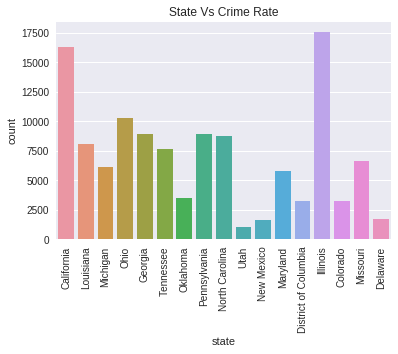

In [27]:
state_vs_crimecount=sns.countplot(x=df["state"],data=df,order=df["state"].head(30).value_counts().index)
state_vs_crimecount.set_xticklabels(state_vs_crimecount.get_xticklabels(),rotation=90)
state_vs_crimecount.set_title("State Vs Crime Rate")

In [ ]:
city_vs_crimerate=df['city_or_county'].value_counts().head(10)
city_vs_crimerate=sns.barplot(x=city_vs_crimerate.index,y=city_vs_crimerate)
city_vs_crimerate.set_xticklabels(city_vs_crimerate.get_xticklabels(),rotation=45)
city_vs_crimerate.set_title("Top 10 High Crime Rate Cities")

In [ ]:
import plotly 

plotly.tools.set_credentials_file(username='nadide', api_key='i3fmC2K0Vb6obeWsiu2X')





In [36]:
from  plotly.offline import plot
import plotly.graph_objs as go



trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

py.plot(data, filename = 'basic-line', auto_open=True)

PlotlyRequestError: ignored

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go


from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
from matplotlib import cm


temp = df["state"].value_counts().head(30)
temp.iplot(kind='bar', xTitle = 'State name', yTitle = "# of incidents", title = 'Top States with highest number of Gun Violence')

In [ ]:
# Import the required libraries 
import io

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 
import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar
from PIL import Image 
import numpy as np

import folium 
from folium import plugins 


init_notebook_mode(connected=True)
punc = string.punctuation
from datetime import datetime



df = pd.read_csv(io.BytesIO(uploaded['gun-violence-data_01-2013_03-2018.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/1QDXLAl5xjFL-ZF9Zql_Vj2JMzIK08aju/view?usp=sharing"